#**Covid - 19 classification**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
import os
import sys

In [ ]:
# Metadata and CSV Files are read

metadata = pd.read_csv('Chest_xray_Corona_Metadata.csv')
summary = pd.read_csv('Chest_xray_Corona_dataset_Summary.csv')

# Random 10 rows will be printed
metadata.sample(10)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
4495,4495,person70_bacteria_341.jpeg,Pnemonia,TRAIN,NaN,bacteria
256,256,IM-0467-0001.jpeg,Normal,TRAIN,NaN,NaN
3444,3444,person373_bacteria_1708.jpeg,Pnemonia,TRAIN,NaN,bacteria
4602,4602,person64_bacteria_320.jpeg,Pnemonia,TRAIN,NaN,bacteria
5719,5742,person96_bacteria_464.jpeg,Pnemonia,TEST,NaN,bacteria
5498,5521,NORMAL2-IM-0364-0001.jpeg,Normal,TEST,NaN,NaN
4455,4455,person728_bacteria_2630.jpeg,Pnemonia,TRAIN,NaN,bacteria
5324,5347,IM-0110-0001.jpeg,Normal,TEST,NaN,NaN
4627,4627,person640_bacteria_2532.jpeg,Pnemonia,TRAIN,NaN,bacteria
4553,4553,person673_bacteria_2566.jpeg,Pnemonia,TRAIN,NaN,bacteria


In [ ]:
# The dataset is divided into train and test data

train_data = metadata[metadata['Dataset_type'] == 'TRAIN']
test_data = metadata[metadata['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == metadata.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5451,5474,NORMAL2-IM-0201-0001.jpeg,Normal,TEST,NaN,NaN
5682,5705,person110_bacteria_531.jpeg,Pnemonia,TEST,NaN,bacteria
5820,5843,person3_virus_15.jpeg,Pnemonia,TEST,NaN,Virus
5315,5338,NORMAL2-IM-0029-0001.jpeg,Normal,TEST,NaN,NaN
5433,5456,NORMAL2-IM-0249-0001.jpeg,Normal,TEST,NaN,NaN
5389,5412,NORMAL2-IM-0321-0001.jpeg,Normal,TEST,NaN,NaN
5534,5557,person1618_virus_2805.jpeg,Pnemonia,TEST,NaN,Virus
5893,5916,person1653_virus_2858.jpeg,Pnemonia,TEST,NaN,Virus
5472,5495,NORMAL2-IM-0112-0001.jpeg,Normal,TEST,NaN,NaN
5634,5657,person126_bacteria_599.jpeg,Pnemonia,TEST,NaN,bacteria


In [ ]:
# Substitute all null values with string 'unknown'

train_fill = train_data.fillna('unknown')
test_fill = test_data.fillna('unknown')

# Random 10 rows are printed
train_fill.sample(10)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
2845,2845,person1616_bacteria_4251.jpeg,Pnemonia,TRAIN,unknown,bacteria
2663,2663,person1756_bacteria_4598.jpeg,Pnemonia,TRAIN,unknown,bacteria
3252,3252,person2_bacteria_4.jpeg,Pnemonia,TRAIN,unknown,bacteria
1542,1542,person1073_bacteria_3011.jpeg,Pnemonia,TRAIN,unknown,bacteria
3137,3137,person326_bacteria_1505.jpeg,Pnemonia,TRAIN,unknown,bacteria
1682,1682,person124_virus_231.jpeg,Pnemonia,TRAIN,unknown,Virus
1509,1509,person108_virus_199.jpeg,Pnemonia,TRAIN,unknown,Virus
1345,1345,person1019_bacteria_2950.jpeg,Pnemonia,TRAIN,unknown,bacteria
2928,2928,person262_bacteria_1226.jpeg,Pnemonia,TRAIN,unknown,bacteria
1564,1564,person1062_bacteria_2996.jpeg,Pnemonia,TRAIN,unknown,bacteria


In [ ]:
# Print the number of Normal case and the Covid-19 Cases

print(f"Label = Normal Cases : {train_data[train_data['Label'] == 'Normal'].shape[0]}")
print(f"""Label = Pnemonia + Label_2_Virus_category = COVID-19 cases : {train_data[(train_data['Label'] == 'Pnemonia')
      & (train_data['Label_2_Virus_category'] == 'COVID-19')].shape[0]}""")
print(f"""Label = Normal + Label_2_Virus_category = COVID-19 cases : {train_data[(train_data['Label'] == 'Normal')
      & (train_data['Label_2_Virus_category'] == 'COVID-19')].shape[0]}""")

Label = Normal Cases : 1342
Label = Pnemonia + Label_2_Virus_category = COVID-19 cases : 58
Label = Normal + Label_2_Virus_category = COVID-19 cases : 0


In [ ]:
# Set the path for Test Folder and Train folder

TEST_FOLDER = 'Coronahack-Chest-XRay-Dataset/test'
TRAIN_FOLDER = 'Coronahack-Chest-XRay-Dataset/train'

assert os.path.isdir(TEST_FOLDER) == True
assert os.path.isdir(TRAIN_FOLDER) == True

In [ ]:
sample_train_images = list(os.walk(TRAIN_FOLDER))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(TRAIN_FOLDER, x), sample_train_images))

sample_test_images = list(os.walk(TEST_FOLDER))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(TEST_FOLDER, x), sample_test_images))

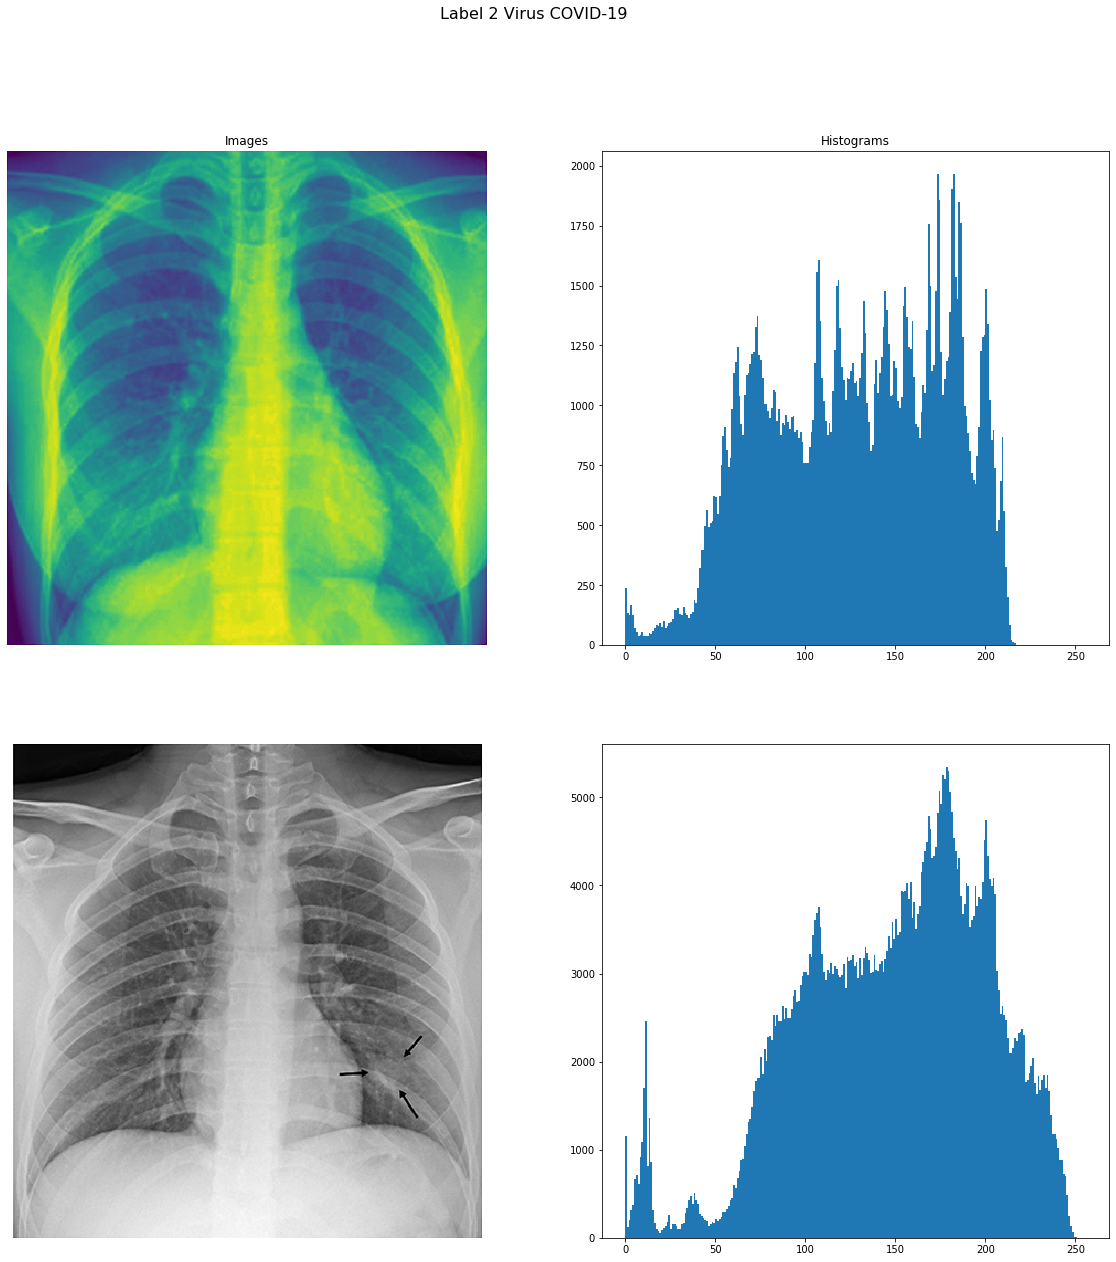

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

# The training data with the Label 2 virus category will be declared as Covid Positive

covid19_type_file_paths = train_data[train_data['Label_2_Virus_category'] == 'COVID-19']['X_ray_image_name'].values
sample_covid19_file_paths = covid19_type_file_paths[:2]
sample_covid19_file_paths = list(map(lambda x: os.path.join(TRAIN_FOLDER, x), sample_covid19_file_paths))

for row, file_path in enumerate(sample_covid19_file_paths):
    image = plt.imread(file_path)
    ax[row, 0].imshow(image)
    ax[row, 1].hist(image.ravel(), 256, [0,256])#ravel used to create contiguous flattened array
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label 2 Virus COVID-19', size=16)
plt.show()

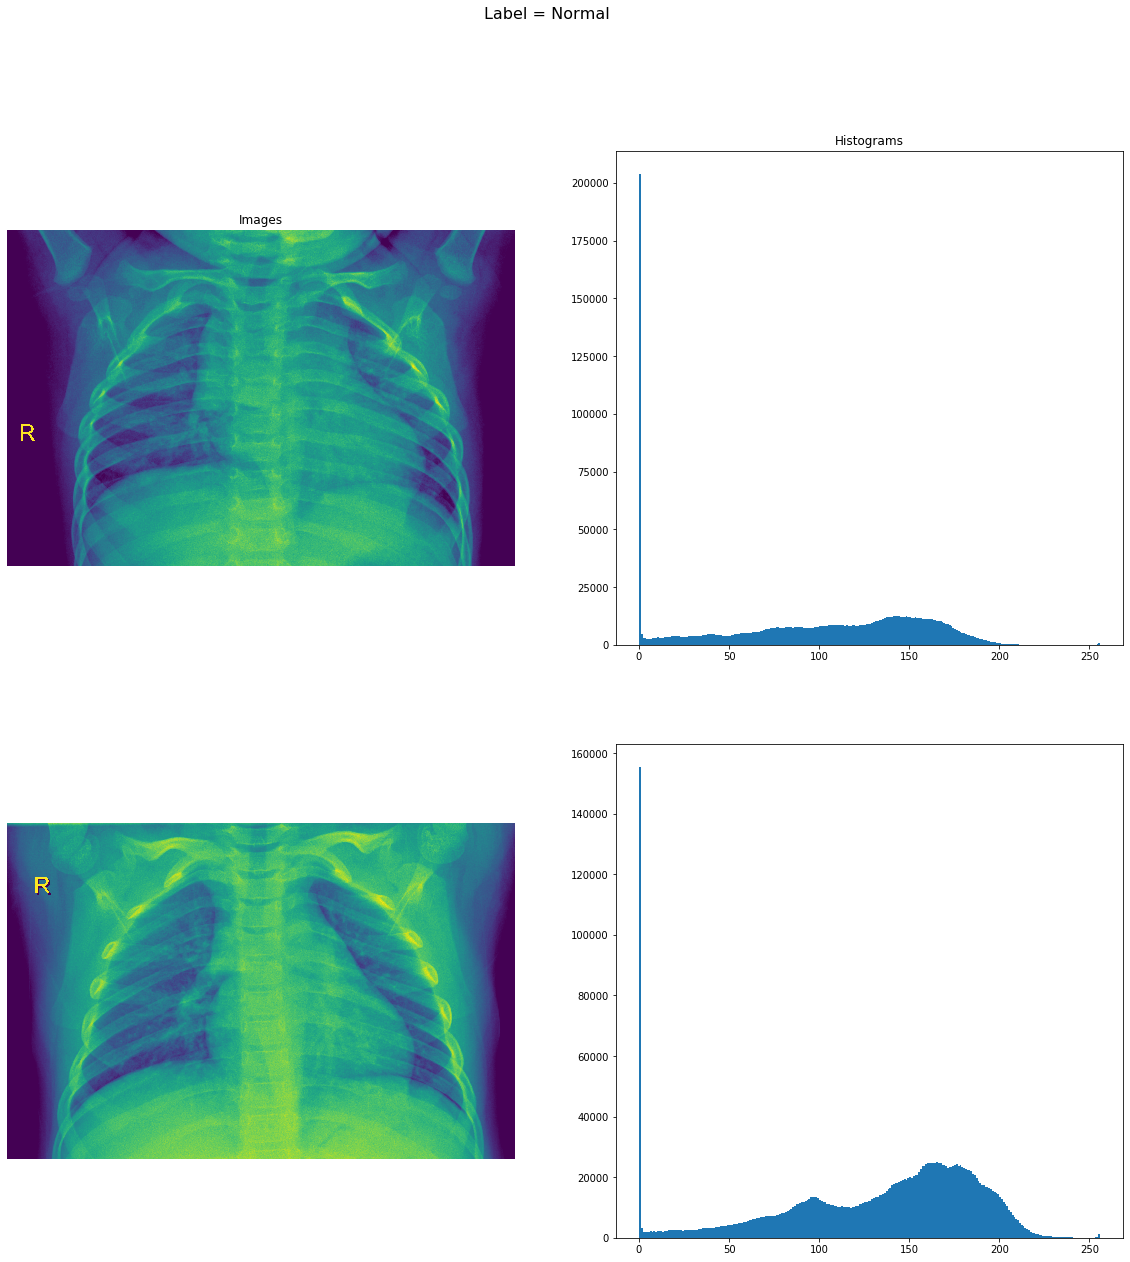

In [ ]:
# Plot b/w image histograms of Label type "Normal" patients 

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

other_type_file_paths = train_data[train_data['Label'] == 'Normal']['X_ray_image_name'].values
sample_other_file_paths = other_type_file_paths[:2]
sample_other_file_paths = list(map(lambda x: os.path.join(TRAIN_FOLDER, x), sample_other_file_paths))

for row, file_path in enumerate(sample_other_file_paths):
    image = plt.imread(file_path)
    ax[row, 0].imshow(image)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = Normal', size=16)
plt.show()

In [ ]:
# Generate the final train data from original train data with conditions refered from EDA inference

final_train_data = train_data[(train_data['Label'] == 'Normal') | 
                              ((train_data['Label'] == 'Pnemonia') & (train_data['Label_2_Virus_category'] == 'COVID-19'))]


# Create a target attribute where value = positive if 'Pnemonia + COVID-19' or value = negative if 'Normal'

final_train_data['target'] = ['negative' if holder == 'Normal' else 'positive' for holder in final_train_data['Label']]

final_train_data = shuffle(final_train_data, random_state=1)

final_validation_data = final_train_data.iloc[1000:, :]
final_train_data = final_train_data.iloc[:1000, :]

print(f"Final train data shape : {final_train_data.shape}")
final_train_data.sample(10)

Final train data shape : (1000, 7)


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,target
358,358,IM-0543-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
932,932,NORMAL2-IM-0839-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
574,574,IM-0707-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
527,527,IM-0685-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
301,301,IM-0491-0001-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
1024,1024,NORMAL2-IM-1015-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
5225,5234,jkms-35-e79-g001-l-c.jpg,Pnemonia,TRAIN,COVID-19,Virus,positive
1198,1198,NORMAL2-IM-1188-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
1121,1121,NORMAL2-IM-1128-0001-0002.jpeg,Normal,TRAIN,NaN,NaN,negative
40,40,IM-0238-0001.jpeg,Normal,TRAIN,NaN,NaN,negative


In [ ]:
#image datagenerator is used to change features of image(scaling,rotation,breadth)
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=[0.9, 1.25],
    brightness_range=[0.5, 1.5]
)

test_image_generator = ImageDataGenerator(
    rescale=1./255
)
#flowfromdataframe method is used to generate batches containing normalized data in  directory
train_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_train_data,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

validation_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_validation_data,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

test_generator = test_image_generator.flow_from_dataframe(
    dataframe=test_data,
    directory=TEST_FOLDER,
    x_col='X_ray_image_name',
    target_size=(224, 224),
    shuffle=False,
    batch_size=16,
    class_mode=None
)

Found 1000 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.
Found 624 validated image filenames.


In [ ]:
train_generator.class_indices

{'negative': 0, 'positive': 1}

In [ ]:
validation_generator.class_indices

{'negative': 0, 'positive': 1}

In [ ]:
#flatten is used to flatten the input
#Conv2D is used to create a convolution kernel that is wind with layers input which helps produce a tensor of outputs
#MaxPooling2D downsamples the input representation by taking the maximum value over the window defined by pool_size 
#for each dimension along the features axis
#Dense layer connects previous layer o/p to next layer o/p
#Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time,
#which helps prevent overfitting

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

#Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [ ]:
#fit generator is used to fit a large data into memory
hist =  model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=10
     )

Epoch 1/10


C:\Users\LENOVO\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\LENOVO\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 107s 11s/step - loss: 0.8448 - accuracy: 0.9125 - val_loss: 0.5729 - val_accuracy: 0.9375
Epoch 2/10
10/10 [==============================] - 63s 6s/step - loss: 0.1829 - accuracy: 0.9750 - val_loss: 0.3310 - val_accuracy: 0.9375
Epoch 3/10
10/10 [==============================] - 62s 6s/step - loss: 0.3319 - accuracy: 0.9375 - val_loss: 0.5040 - val_accuracy: 0.9125
Epoch 4/10
10/10 [==============================] - 61s 6s/step - loss: 0.2264 - accuracy: 0.9750 - val_loss: 0.0621 - val_accuracy: 0.9750
Epoch 5/10
10/10 [==============================] - 60s 6s/step - loss: 0.0719 - accuracy: 0.9875 - val_loss: 0.8083 - val_accuracy: 0.9500
Epoch 6/10
10/10 [==============================] - 81s 8s/step - loss: 0.2646 - accuracy: 0.9875 - val_loss: 0.3595 - val_accuracy: 0.9875
Epoch 7/10
10/10 [==============================] - 53s 5s/step - loss: 0.2034 - accuracy: 0.9750 - val_loss: 0.1019 - val_accuracy: 0.9125
Epoch 8/10
10/10 [===========

In [ ]:
acc=model.evaluate_generator(train_generator)
print("Accuracy=",acc[1])

In [ ]:
acc=model.evaluate_generator(validation_generator)
print("Accuracy=",acc[1])